In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer

In [2]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


<Axes: xlabel='SalePrice', ylabel='Count'>

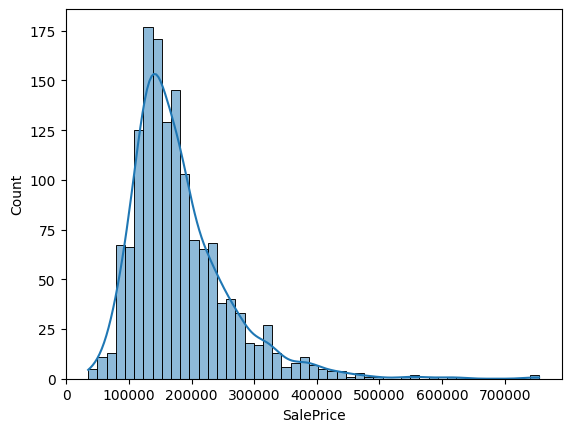

In [7]:
sns.histplot(data = train, x = 'SalePrice',kde = True)

In [8]:
fig = px.histogram(train, x = 'SalePrice', marginal = 'box')
fig.update_layout(bargap  = 0.1)

In [9]:
num = train.select_dtypes(include = ['int64','float64'])

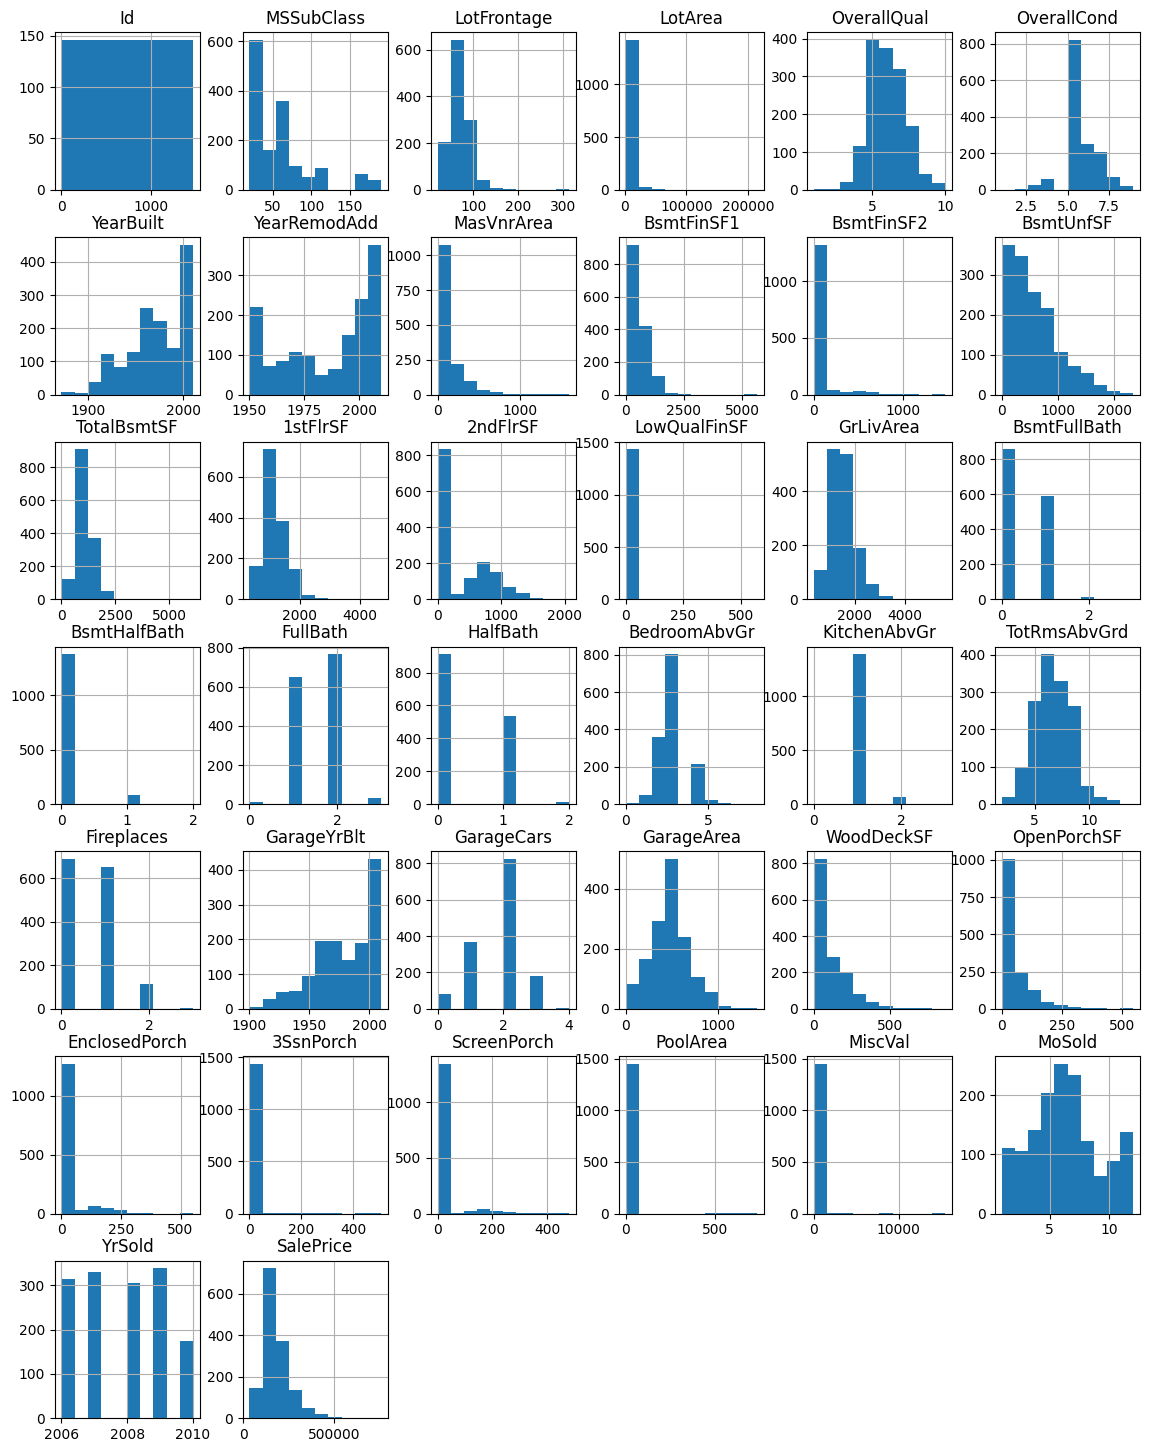

In [10]:
num.hist(figsize = (14,18));

In [11]:
sns.pairplot(num);

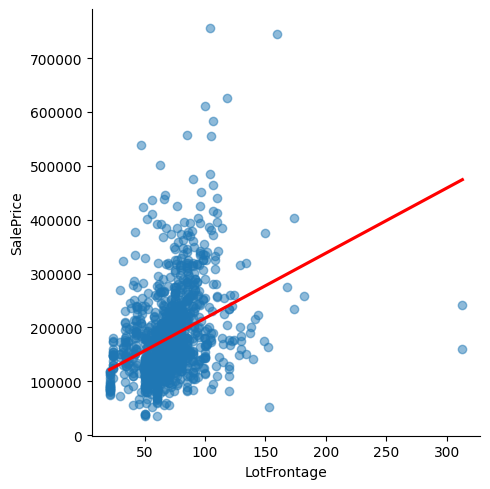

In [13]:
sns.lmplot(data = train, x = 'LotFrontage', y = 'SalePrice',ci = False,line_kws = {'color':'red'},scatter_kws = {'alpha': 0.5});

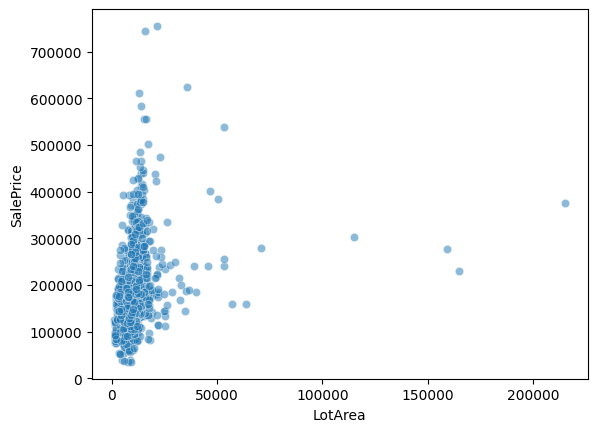

In [15]:
sns.scatterplot(data = train, x = 'LotArea', y = 'SalePrice',alpha = 0.5);

<Axes: xlabel='LotArea'>

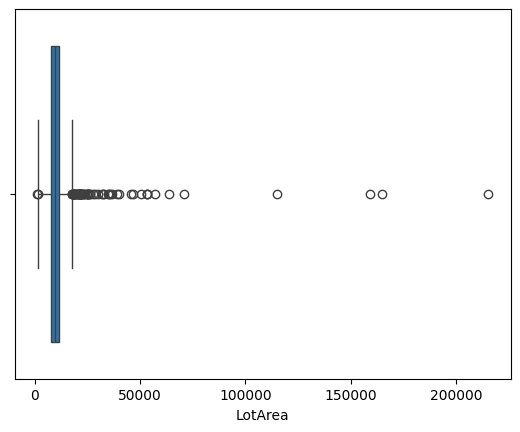

In [16]:
sns.boxplot(data = train, x = 'LotArea')

In [18]:
train.groupby('YrSold')['SalePrice'].mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [19]:
remod = train.groupby('YearRemodAdd')['SalePrice'].mean()
remod

YearRemodAdd
1950    117463.056180
1951    129975.000000
1952    110398.600000
1953    147640.000000
1954    121142.857143
            ...      
2006    229471.134021
2007    224807.250000
2008    269709.100000
2009    284085.391304
2010    336963.500000
Name: SalePrice, Length: 61, dtype: float64

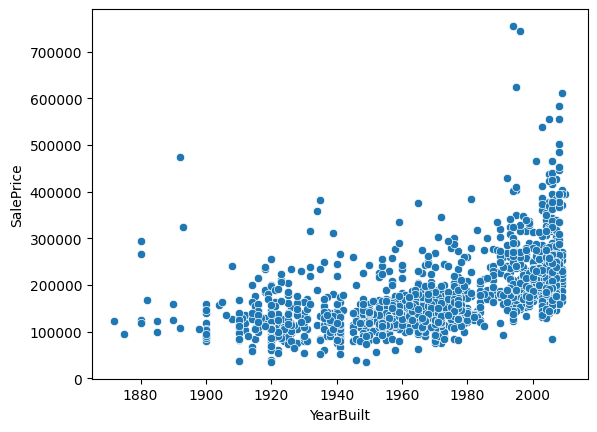

In [20]:
sns.scatterplot(train, x = 'YearBuilt',y = 'SalePrice');

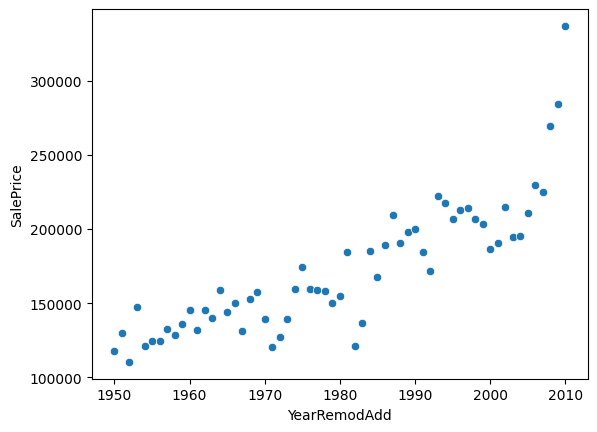

In [21]:
sns.scatterplot(remod);

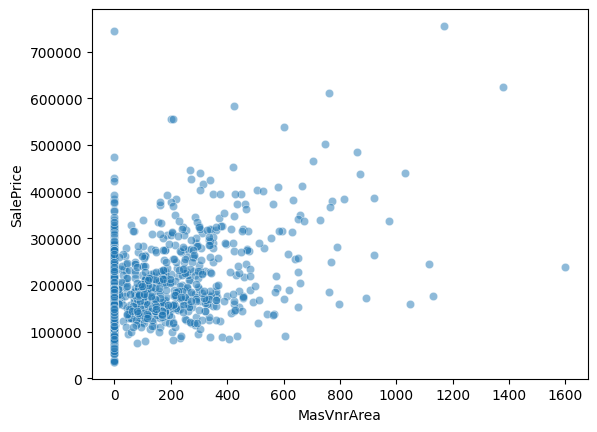

In [22]:
sns.scatterplot(data = train, x = 'MasVnrArea', y = 'SalePrice',alpha = 0.5);

<Axes: xlabel='MasVnrArea'>

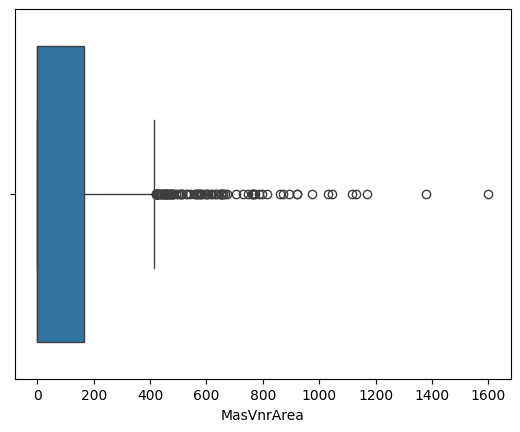

In [23]:
sns.boxplot(train, x = 'MasVnrArea')

In [24]:
# train.query('MasVnrArea > ')

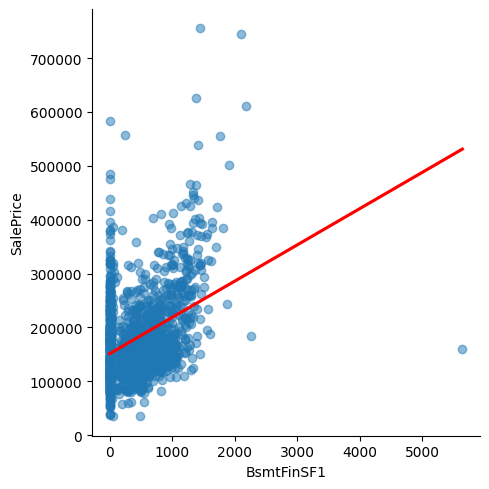

In [25]:
sns.lmplot(data = train, x = 'BsmtFinSF1', y = 'SalePrice',ci = False,line_kws = {'color':'red'},scatter_kws = {'alpha': 0.5});

In [27]:
train.isnull().sum()*100 / len(train)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [29]:
 no_col = ['Alley','Fence','MasVnrType','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtQual','BsmtCond']
 col_0 = ['MasVnrArea','LotFrontage','MasVnrArea']
 col_unf = ['BsmtFinType2','BsmtFinType1']

In [31]:
for col in no_col:
  train[col].fillna('No',inplace = True)
  test[col].fillna('No',inplace = True)

In [32]:
# ['GarageFinish','BsmtFinType1','BsmtFinType2']
for col in col_unf:
  train[col].fillna('Unf',inplace = True)

In [33]:
# ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea','LotFrontage','MSSubClass']:
for x in col_0:
  train[x].fillna(0, inplace = True)
  test[x].fillna(0, inplace = True)

In [34]:
null_per = train.isnull().sum()*100 / len(train)
null_per.sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
GarageYrBlt      5.547945
Electrical       0.068493
LowQualFinSF     0.000000
                  ...    
MasVnrArea       0.000000
MasVnrType       0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [35]:
train[train['Electrical'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No,Reg,Lvl,AllPub,...,0,NaN,No,NaN,0,5,2008,WD,Normal,167500


In [36]:
train['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [37]:
train['Electrical'].fillna('SBrkr',inplace = True)
test['Electrical'].fillna('SBrkr',inplace = True)

In [38]:
null_per = train.isnull().sum()*100 / len(train)
null_per.sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
GarageYrBlt      5.547945
BedroomAbvGr     0.000000
GarageType       0.000000
                  ...    
MasVnrArea       0.000000
MasVnrType       0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [39]:
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test = test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

# Feature Engineering

In [40]:
 train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3Ssn

In [41]:
train['totalsf'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']
test['totalsf'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']

In [42]:
train['totalbaths'] = train['BsmtFullBath'] + train['FullBath'] + 0.5 * (train['BsmtHalfBath'] + train['HalfBath'])
test['totalbaths'] = test['BsmtFullBath'] + test['FullBath'] + 0.5 * (test['BsmtHalfBath'] + test['HalfBath'])

In [43]:
train['totalporchsf'] = train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']
test['totalporchsf'] = test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF']

In [44]:
train= train.drop(columns=['Id','1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test = test.drop(columns=['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

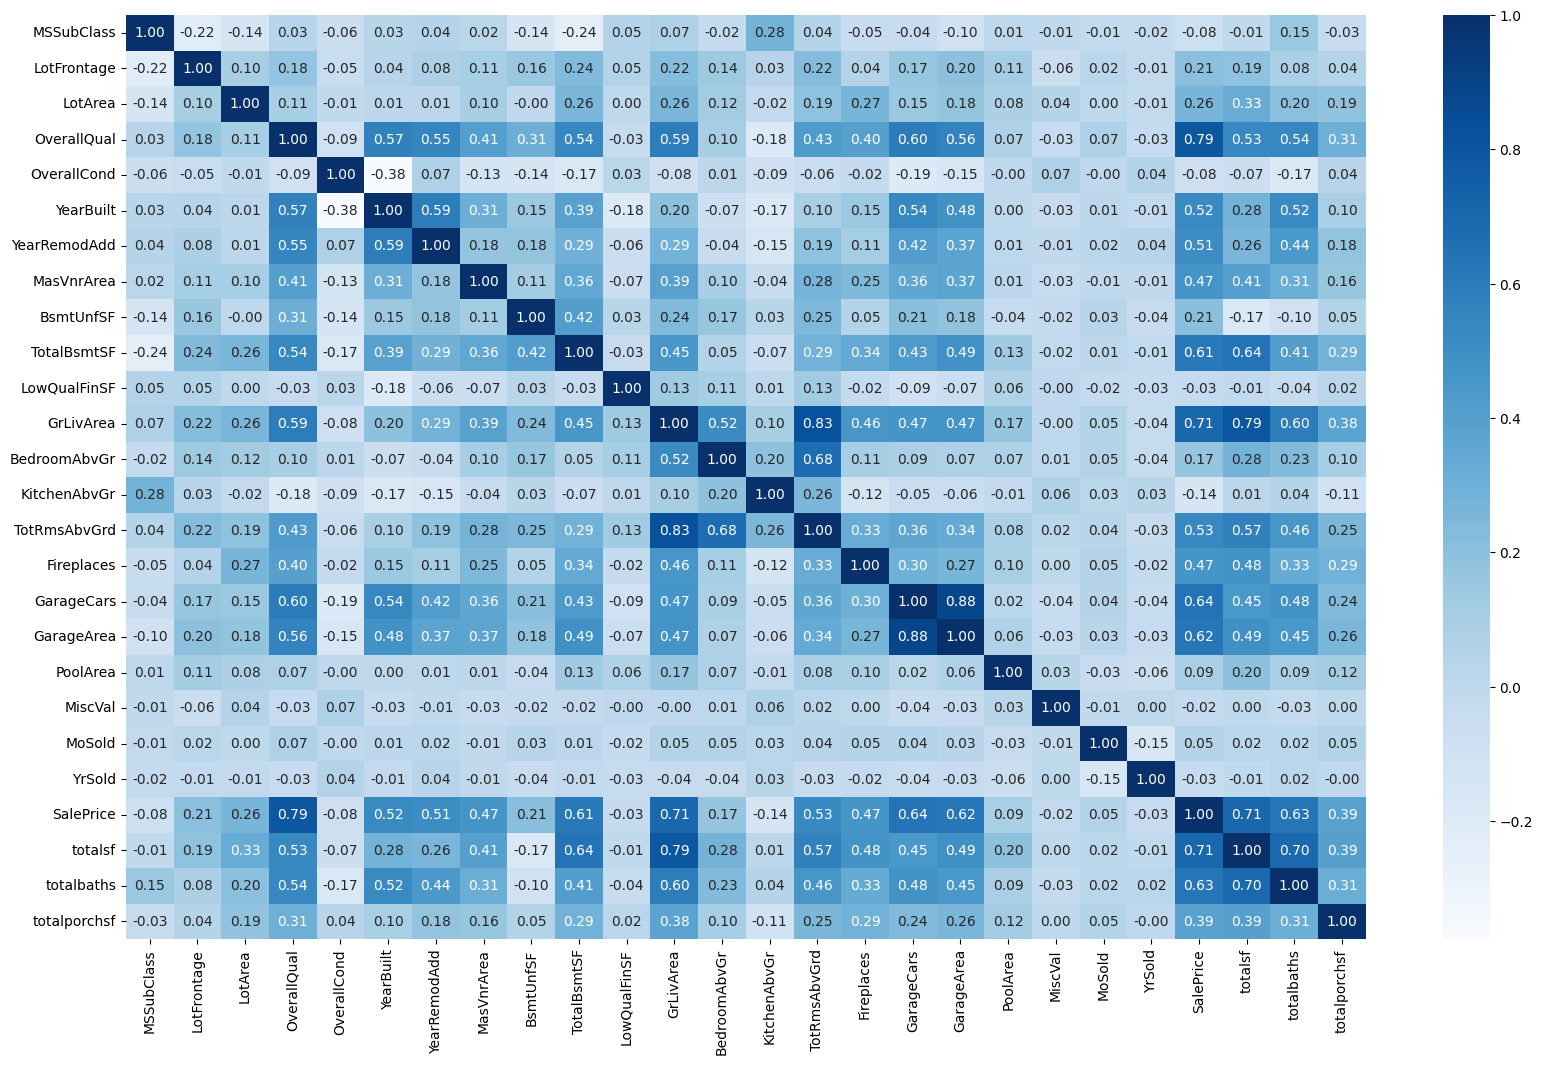

In [45]:
plt.figure(figsize = (20,12))
sns.heatmap(train.corr(numeric_only = True), annot = True, cmap = 'Blues', fmt = '.2f')


In [46]:
train= train.drop(columns=['GarageArea'])
test = test.drop(columns=['GarageArea'])

### As our target variable is right skewed we need to use log transform to convert to normal distribution.

In [47]:
train['SalePrice'] = np.log1p(train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

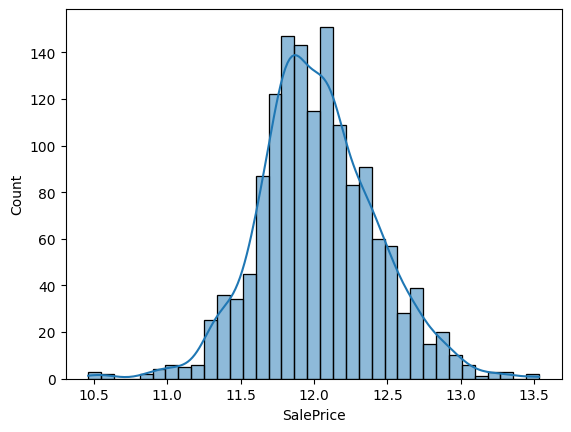

In [48]:
sns.histplot(data = train, x = 'SalePrice',kde = True)

In [49]:
#Ordinal Encoding
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [50]:
#One Hot Encoding
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [51]:
num_cols = train.select_dtypes(include = ['int64','float64']).columns.drop(['SalePrice'])

# Pipelines

In [52]:
#using Robust Scaler so it is less affected by outliers
num_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy = 'mean')),
    ('scaler',RobustScaler())
])

In [53]:
ode_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy = 'most_frequent')),
    ('ode',OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = -1))

])

In [54]:
ohe_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy = 'most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown = 'ignore',sparse_output = False))
])

In [55]:
col_trans = ColumnTransformer(transformers = [
    ('num_p',num_pipeline,num_cols),
    ('ode_p',ode_pipeline,ode_cols),
    ('ohe_p',ohe_pipeline,ohe_cols),
],
remainder = 'passthrough',
n_jobs = -1)

In [56]:
pipeline = Pipeline(steps = [
    ('preprocessing',col_trans)

])

In [57]:
X = train.drop('SalePrice',axis = 1)
y = train['SalePrice']

In [58]:
X_preprocessed = pipeline.fit_transform(X)

# Train Test Split

In [59]:
X_train,X_test, y_train,y_test = train_test_split(X_preprocessed, y, test_size = 0.2,random_state = 42)

# Linear Regression

In [60]:
lr = LinearRegression()

In [61]:
# for column in train.columns:
#     non_numeric_values = train[column].loc[~pd.to_numeric(train[column], errors='coerce').notnull()]
#     if not non_numeric_values.empty:
#         print(f"Column '{column}' contains non-numeric values: {non_numeric_values.unique()}")

In [62]:
# train['BsmtFinType1'].dtypes, train['BsmtFinType2'].dtypes, train['GarageFinish'].dtypes

In [63]:
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred_lr = lr.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

0.12790266933839295

# Random Forest Regressor

In [66]:
rfr = RandomForestRegressor(random_state = 10)

In [67]:
param_grid_rfr = {
    'max_depth':[3,5,10],
    'n_estimators':[100,250,500],
    'min_samples_split':[3,5,10]
}

In [68]:
rfr_cv = GridSearchCV(rfr, param_grid_rfr,cv = 5, scoring = 'neg_mean_squared_error',n_jobs = -1)

In [69]:
rfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [70]:
np.sqrt(-1 * rfr_cv.best_score_)

0.14532119729619652

In [71]:
rfr_cv.best_params_

{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 500}

# XGB Regressor

In [72]:
xgb = XGBRegressor(random_state = 10)

In [73]:
param_grid_xgb = {
    'learning_rate':[0.05,0.1,0.2],
    'n_estimators':[300,500],
    'max_depth':[3,5],
    'gamma':[0.1,0.2]
}

In [74]:
xgb_cv = GridSearchCV(xgb, param_grid_xgb, cv = 3, scoring = 'neg_mean_squared_error',n_jobs = -1 )

In [75]:
xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=10, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5], 'n_estimators': [300, 500]},
             scoring='neg_mean_squared_error')

In [76]:
np.sqrt(-1 * xgb_cv.best_score_)

0.13714539203092413

# Ridge

In [77]:
ridge = Ridge()

In [78]:
param_grid_ridge = {
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [79]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [80]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [81]:
np.sqrt(-1 * ridge_cv.best_score_)

0.14835290144135457

# Lasso

In [82]:
lasso = Lasso()

In [83]:
lasso.fit(X_train,y_train)

Lasso()

In [84]:
y_pred_lasso = lasso.predict(X_test)

In [85]:
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

0.4331548093446671

# ElasticNet

In [86]:
en = ElasticNet()

In [87]:
en.fit(X_train,y_train)

ElasticNet()

In [88]:
y_pred_en = en.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test, y_pred_en))

0.43325463861822855

# Gradient Boosting Regressor

In [90]:
gbr =  GradientBoostingRegressor()

In [91]:
param_grid_gbr = {
    'max_depth': [10, 15, 20],
    'n_estimators': [200, 300, 500],
    'min_samples_leaf': [10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1]
}

In [92]:
gbr_cv = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [93]:
gbr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [10, 15, 20],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [200, 300, 500]},
             scoring='neg_mean_squared_error')

In [94]:
np.sqrt(-1 * gbr_cv.best_score_)

0.13624215046807345

# Stacking Regressor

In [99]:

estimators = [
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [100]:
stackreg = StackingRegressor(estimators = estimators, final_estimator = xgb)

In [101]:
stackreg.fit(X_train,y_train)

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(max_depth=10,
                                                         min_samples_leaf=30,
                                                         n_estimators=200)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamm...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=10, ...))

In [102]:
y_pred_stack = stackreg.predict(X_test)

In [103]:
np.sqrt(mean_squared_error(y_test,y_pred_stack))

0.1517179364036505

In [104]:
test_preprocess = pipeline.transform(test)

In [108]:
y_stacking = np.exp(stackreg.predict(test_preprocess))


df_y_stacking_out = test[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('/content/sample_data/submission.csv', index=False)

<ipython-input-108-f643bac9f3a3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

